# Tarea 18

## Mapeo logistico

El mapeo logıstico $x_n+1 = f(x_n) = rx_n(1 − x_n)$, que
puede interpretarse como un modelo de población en un sistema en el que los recursos son
limitados. El crecimiento exponencial dado por la parte $x_(n+1) = rx_n$ resulta limitado por la nolinealidad $−rx^2n$, que representa la competencia entre los individuos por los recursos compartidos.

Donde r es el parámetro de control. Las repeticiones iteradas generan una secuencia de puntos conocida como órbita donde $\:\:r\in[0,4]\:\mathrm{y}\:x\in[0,1]$

Usando exponente de Lyapunov $\lambda$ que está dado por $\lambda(x_{0})=\lim_{n\to\infty}\frac{1}{n}\sum_{i=0}^{n-1}\log\left|\:f'(x_{i})\right|\:\:\mathrm{con}\:\:x_{i}=f(x_{i-1}).$ para cada orbita que inicia de $x_0$

Lo que se puede ver de la Ecuación es que cuando el valor absoluto de la derivada es mayor que 1, entonces el logaritmo es positivo; si los sucesivos puntos divergen, entonces el promedio de los logaritmos del valor absoluto de la derivada es
positivo. Esto permite dar una definición de comportamiento caótico:

Un mapeo unidimensional tiene trayectorias caóticas para un valor particular del parámetro si el exponente de Liapunov es positivo para ese valor del parámetro.

Con este resultado es posible calcular el exponente de Liapunov como función de r para la aplicación logística.

In [1]:
using PyPlot

In [14]:
#FORMULA  de recurrencia de una derivada sobre un punto x_0 para cualquier función
function df(f, x0)
    return (9*f(x0+5*0.01)-125*f(x0+3*0.01)+2250*f(x0+0.01)-2250*f(x0-0.01)+125*f(x0-3*0.01)-9*f(x0-5*0.01))/(3840*0.01)
end

df (generic function with 1 method)

In [15]:
#empezemos por definir el exponente de Lyaponuv por su expresion
function explyap(f,x0,list,n)
    lambda = []                                     
    bif = []                                         # iteraciones 
    rbif = []
    for r in list
        x = x0
        g(z) = f(z,r)    
        y = df(g,x)      # derivada de f en x para r fija.
        l = log(abs(y))                             
        for i in 2:n
            x = f(x,r)                               # f(x,r)=rx(1-x).
            y = df(g,x)  
            l += log(abs(y))                         
        end
        push!(lambda,l/n)                        
        for j in 1:200
            x = f(x,r)                               
            push!(bif,x)                            
            push!(rbif,r)
        end
    end
    
    return lambda,rbif,bif
    
end

explyap (generic function with 1 method)

In [16]:
f(x,r)=r*x*(1-x);  #formula de recurrencia del mapeo logistico

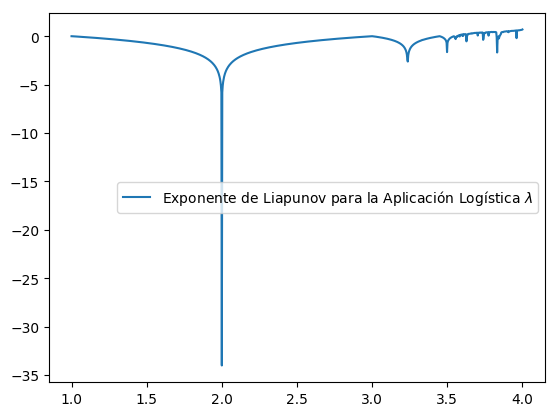

In [22]:
r=linspace(1,4,1000)
L=explyap(f,0.1,r,5000)
plot(r,L[1],label=L"Exponente de Liapunov para la Aplicación Logística $\lambda$")
legend();

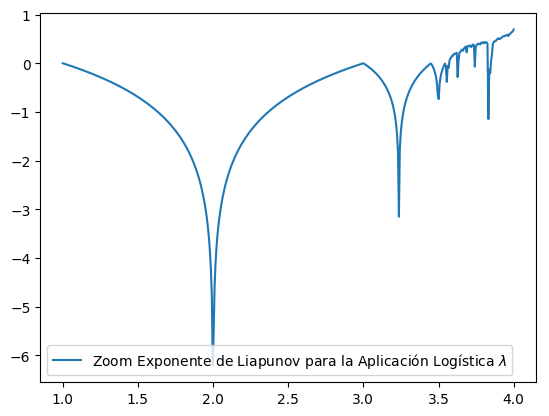

In [24]:
r=linspace(1,4,500)
L=explyap(f,0.1,r,10000)
plot(r,L[1],label=L"Zoom Exponente de Liapunov para la Aplicación Logística $\lambda$")
legend();

Podemos ver que las zonas en las que el exponente de Liapunov es mayor que cero son zonas caóticas, coincidiendo con lo dicho arriba, esta  va pasando por regímenes de periodicidad hasta llegar a zonas en las que su comportamiento se vuelve caótico, dentro de las cuales de nuevo existen zonas de periodicidad.

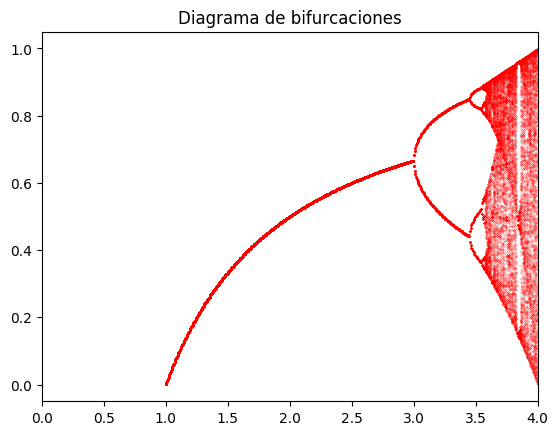

In [25]:
plot(L[2],L[3],"r.",markersize=0.3)
title("Diagrama de bifurcaciones")
xlim(0,4);

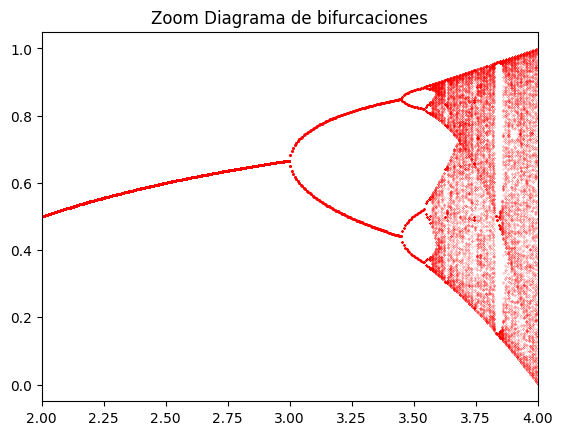

In [34]:
plot(L[2],L[3],"r.",markersize=0.3)
title("Zoom Diagrama de bifurcaciones")
xlim(2,4);

In [ ]:
Veamos que las bifurcaciones ocurren en los picos de la grafica del Exp.de Lyapunov, como se muestra a continuación. 

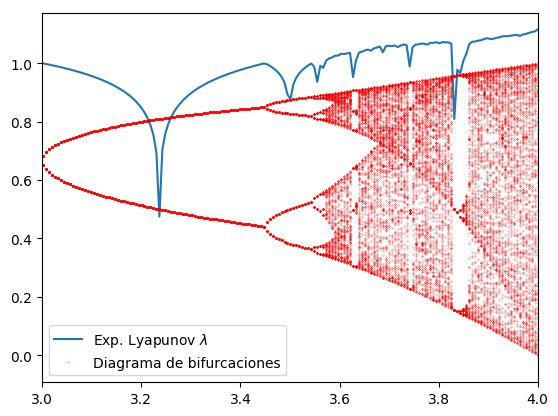

In [43]:
plot(r,(1/6)*L[1]+1,label=L"Exp. Lyapunov $\lambda $")
plot(L[2],L[3],"r.",markersize=0.4,label="Diagrama de bifurcaciones")
xlim(2.999,4);
legend();